# Escuela Politéncnica Nacioanl
## [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan
## Métodos Numéricos
## Jhonn Alexander Saeteros Laime

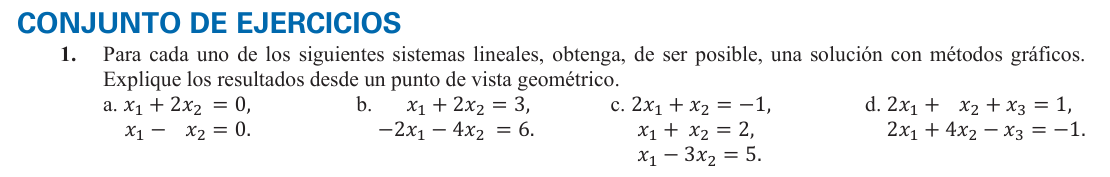

In [251]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sympy import symbols, solve, Matrix

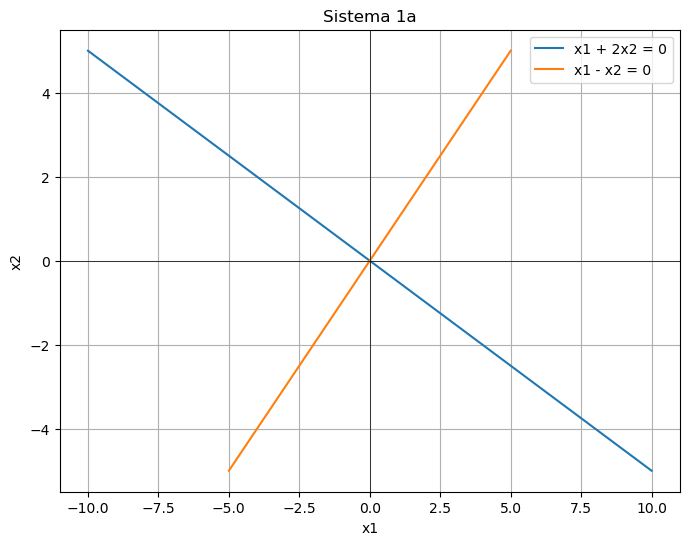

Solución exacta: x1 = 0.0, x2 = -0.0


In [252]:
# Sistema: 
# x1 + 2x2 = 0
# x1 - x2 = 0

x2 = np.linspace(-5, 5, 100)
x1_1 = -2*x2
x1_2 = x2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='x1 + 2x2 = 0')
plt.plot(x1_2, x2, label='x1 - x2 = 0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1a')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Solución exacta
A = np.array([[1, 2], [1, -1]])
b = np.array([0, 0])
sol = linalg.solve(A, b)
print(f"Solución exacta: x1 = {sol[0]}, x2 = {sol[1]}")

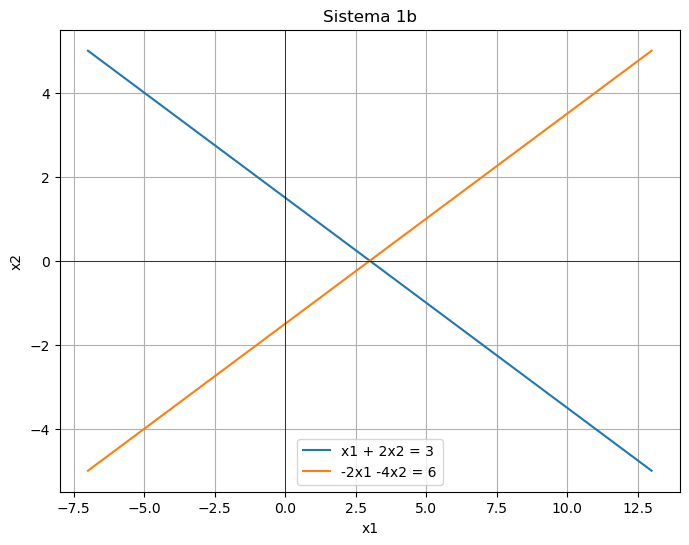

El sistema no tiene solución única (las rectas son paralelas coincidentes o paralelas distintas)


In [253]:
# Sistema:
# x1 + 2x2 = 3
# -2x1 -4x2 = 6

x2 = np.linspace(-5, 5, 100)
x1_1 = 3 - 2*x2
x1_2 = (-6 -4*x2)/-2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='x1 + 2x2 = 3')
plt.plot(x1_2, x2, label='-2x1 -4x2 = 6')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Verificación de solución
A = np.array([[1, 2], [-2, -4]])
b = np.array([3, 6])
try:
    sol = linalg.solve(A, b)
except np.linalg.LinAlgError:
    print("El sistema no tiene solución única (las rectas son paralelas coincidentes o paralelas distintas)")

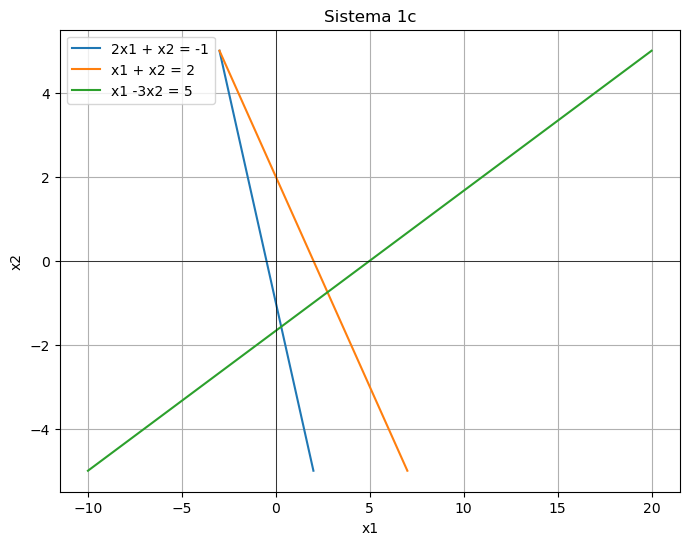

Solución primeras dos ecuaciones: x1 = -3.0, x2 = 5.0
Verificación tercera ecuación: -3.0 - 3*5.0 = -18.0 (debería ser 5)


In [254]:
# Sistema:
# 2x1 + x2 = -1
# x1 + x2 = 2
# x1 -3x2 = 5

x2 = np.linspace(-5, 5, 100)
x1_1 = (-1 - x2)/2
x1_2 = 2 - x2
x1_3 = 5 + 3*x2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='2x1 + x2 = -1')
plt.plot(x1_2, x2, label='x1 + x2 = 2')
plt.plot(x1_3, x2, label='x1 -3x2 = 5')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1c')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Solución de las primeras dos ecuaciones
A = np.array([[2, 1], [1, 1]])
b = np.array([-1, 2])
sol = linalg.solve(A, b)
print(f"Solución primeras dos ecuaciones: x1 = {sol[0]}, x2 = {sol[1]}")
print(f"Verificación tercera ecuación: {sol[0]} - 3*{sol[1]} = {sol[0]-3*sol[1]} (debería ser 5)")

In [255]:
# Sistema:
# 2x1 + x2 + x3 = 1
# 2x1 + 4x2 - x3 = -1

# No podemos graficar fácilmente en 3D, pero podemos resolver paramétricamente
A = np.array([[2, 1, 1], [2, 4, -1]])
b = np.array([1, -1])

# Reducción por eliminación gaussiana
Ab = np.column_stack((A, b))
print("Matriz aumentada:\n", Ab)

# Restamos la primera fila de la segunda
Ab[1] = Ab[1] - Ab[0]
print("\nDespués de eliminación:\n", Ab)

# Solución paramétrica
x3 = symbols('x3')
x2 = (-2 - (-2)*x3)/3
x1 = (1 - x2 - x3)/2
print(f"Solución paramétrica: x1 = {x1}, x2 = {x2}, x3 = libre")

Matriz aumentada:
 [[ 2  1  1  1]
 [ 2  4 -1 -1]]

Después de eliminación:
 [[ 2  1  1  1]
 [ 0  3 -2 -2]]
Solución paramétrica: x1 = 5/6 - 5*x3/6, x2 = 2*x3/3 - 2/3, x3 = libre


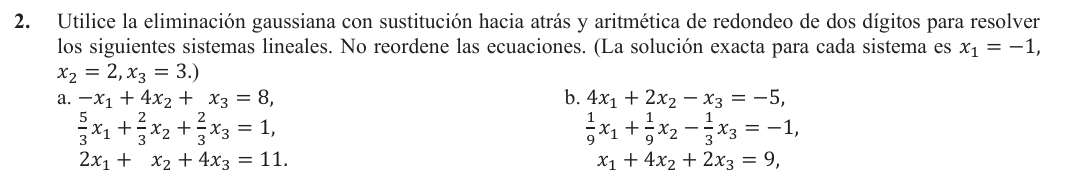

In [256]:
def gauss_elimination_2digit(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        for i in range(k+1, n):
            factor = round(Ab[i,k] / Ab[k,k], 2)
            for j in range(k, n+1):
                Ab[i,j] = round(Ab[i,j] - round(factor * Ab[k,j], 2), 2)
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax = round(sum_ax + round(Ab[i,j] * x[j], 2), 2)
        x[i] = round((Ab[i,n] - sum_ax) / Ab[i,i], 2)
    
    return x

# Sistema a
A = np.array([
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
])
b = np.array([8, 1, 11])

sol = gauss_elimination_2digit(A, b)
print(f"Solución con redondeo a 2 dígitos: {sol}")
print(f"Solución exacta debería ser: [-1, 2, 3]")

Solución con redondeo a 2 dígitos: [-0.99  1.    3.01]
Solución exacta debería ser: [-1, 2, 3]


In [257]:
# Sistema b
A = np.array([
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
])
b = np.array([-5, -1, 9])

sol = gauss_elimination_2digit(A, b)
print(f"Solución con redondeo a 2 dígitos: {sol}")
print(f"Solución exacta debería ser: [-1, 2, 3]")

Solución con redondeo a 2 dígitos: [-1.  1.  3.]
Solución exacta debería ser: [-1, 2, 3]


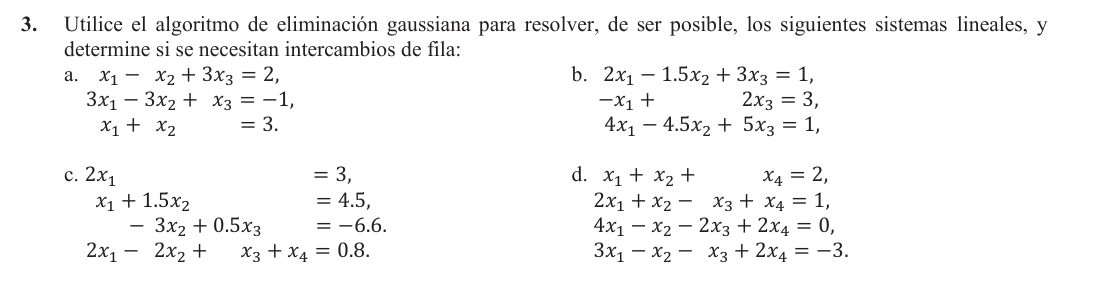

In [258]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
])
b = np.array([2, -1, 3])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [1.1875 1.8125 0.875 ]


In [259]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
])
b = np.array([1, 3, 1])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [-1. -0.  1.]


In [260]:
# Sistema c (4x4)
A = np.array([
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
])
b = np.array([3, 4.5, -6.6, 0.8])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [ 1.5  2.  -1.2  3. ]


In [261]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [1, 1, 0, 1],
    [2, 1, -1, 1],
    [4, -1, -2, 2],
    [3, -1, -1, 2]
])
b = np.array([2, 1, 0, -3])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [ nan  nan  inf -inf]


C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_20196\2074908862.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]


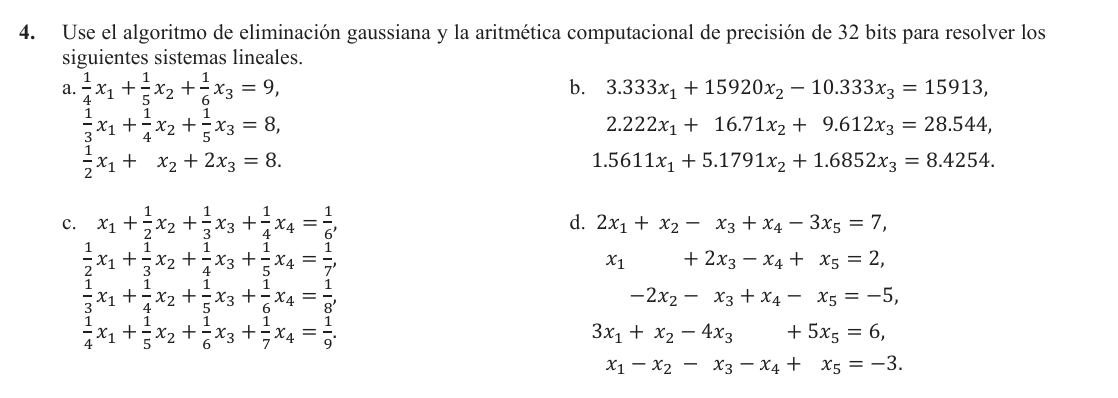

In [262]:
# Configurar precisión de 32 bits
np.float = np.float32

A = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
], dtype=np.float)
b = np.array([9, 8, 8], dtype=np.float)

sol = linalg.solve(A, b)
print(f"Solución con precisión de 32 bits: {sol}")

Solución con precisión de 32 bits: [-227.07697  476.92322 -177.69237]


In [263]:
A = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float)
b = np.array([15913, 28.544, 8.4254], dtype=np.float)

sol = linalg.solve(A, b)
print(f"Solución con precisión de 32 bits: {sol}")

Solución con precisión de 32 bits: [1.0000024 1.        1.0000101]


In [264]:
A = np.array([
    [1, 1/2, 1/3,1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float)
b = np.array([1/6,1/7,1/8,1/9], dtype=np.float)

sol = linalg.solve(A, b)
print(f"Solución con precisión de 32 bits: {sol}")

Solución con precisión de 32 bits: [-0.03174812  0.5952635  -2.381015    2.7778192 ]


In [265]:
# Configurar precisión de 32 bits
np.float = np.float32

# Sistema 4d
A = np.array([
    [2, 1, -1, 1, -3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float)
b = np.array([7, 2, -5, 6, -3], dtype=np.float)

# Eliminación gaussiana con pivoteo parcial
def gauss_elimination_32bit(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(np.float32)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n, dtype=np.float32)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

sol = gauss_elimination_32bit(A, b)
print(f"Solución con precisión de 32 bits: {sol}")

# Verificación con numpy (64 bits) para comparación
np.float = np.float64  # Restauramos a 64 bits para la verificación
A_64 = A.astype(np.float64)
b_64 = b.astype(np.float64)
sol_64 = linalg.solve(A_64, b_64)
print(f"Solución de referencia (64 bits): {sol_64}")
print(f"Diferencia: {sol - sol_64}")

# Verificación del resultado con 32 bits
residual = A.astype(np.float32) @ sol.astype(np.float32) - b.astype(np.float32)
print(f"Residuo (A*x - b): {residual}")

Solución con precisión de 32 bits: [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]
Solución de referencia (64 bits): [1.88304094 2.80701754 0.73099415 1.43859649 0.09356725]
Diferencia: [-3.06737356e-08  2.09139106e-08 -1.65917023e-07 -3.61810651e-07
 -9.61604175e-08]
Residuo (A*x - b): [-4.7683716e-07 -1.1920929e-07  0.0000000e+00  4.7683716e-07
  2.3841858e-07]


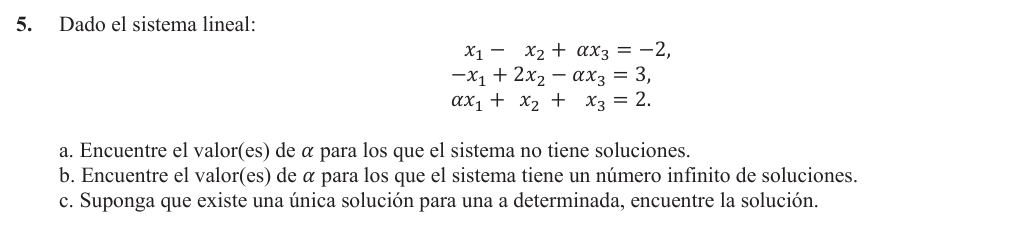

In [266]:
import numpy as np
from scipy import linalg
from sympy import symbols, solve, Matrix

α = symbols('α')

# Definimos la matriz del sistema
A = Matrix([
    [1, -1, α],
    [-1, 2, -α],
    [α, 1, 1]
])
b = Matrix([-2, 3, 2])

# Calculamos el determinante
det_A = A.det()
print(f"Determinante del sistema: {det_A}\n")

# Encontramos los valores críticos de α
critical_alphas = solve(det_A, α)
print(f"Valores críticos de α donde el determinante se anula: {critical_alphas}\n")

# Para estos valores críticos, verificamos si el sistema es incompatible
for alpha_val in critical_alphas:
    A_sub = np.array([
        [1, -1, float(alpha_val)],
        [-1, 2, -float(alpha_val)],
        [float(alpha_val), 1, 1]
    ], dtype=float)
    b_sub = np.array([-2, 3, 2], dtype=float)
    
    # Construimos la matriz aumentada
    Ab = np.column_stack((A_sub, b_sub))
    
    # Calculamos rangos
    rank_A = np.linalg.matrix_rank(A_sub)
    rank_Ab = np.linalg.matrix_rank(Ab)
    
    print(f"Para α = {alpha_val}:")
    print(f"Rango de A: {rank_A}, Rango de [A|b]: {rank_Ab}")
    
    if rank_A < rank_Ab:
        print("→ Sistema incompatible (no tiene solución)\n")
    else:
        print("→ Sistema compatible (infinitas soluciones)\n")

Determinante del sistema: 1 - α**2

Valores críticos de α donde el determinante se anula: [-1, 1]

Para α = -1:
Rango de A: 2, Rango de [A|b]: 2
→ Sistema compatible (infinitas soluciones)

Para α = 1:
Rango de A: 2, Rango de [A|b]: 3
→ Sistema incompatible (no tiene solución)

